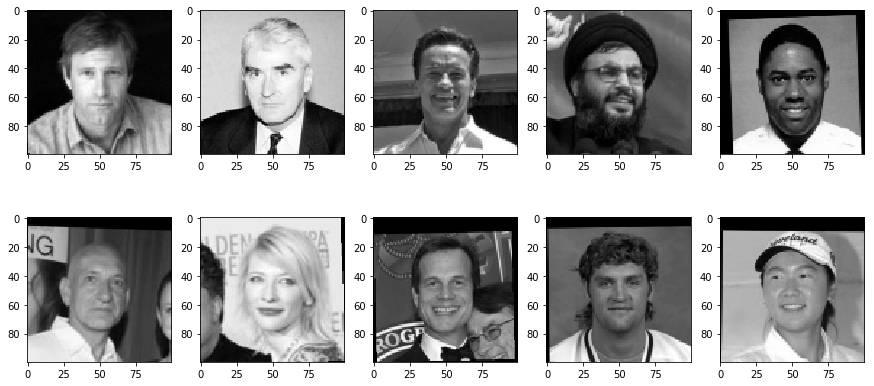

In [1]:
import glob

import cv2
from matplotlib import pyplot as plt
import numpy as np
from numpy import linalg as LA
from scipy.linalg import eigh

%matplotlib inline

shape = (100, 100)

images = np.array([cv2.resize(cv2.imread(file, cv2.IMREAD_GRAYSCALE), shape) for file in glob.glob("pca_images/*.jpg")])

fig, axes = plt.subplots(2, 5, figsize=(15, 7))

for img, ax in zip(images, axes.flatten()):
    ax.imshow(img, cmap=plt.cm.gray)

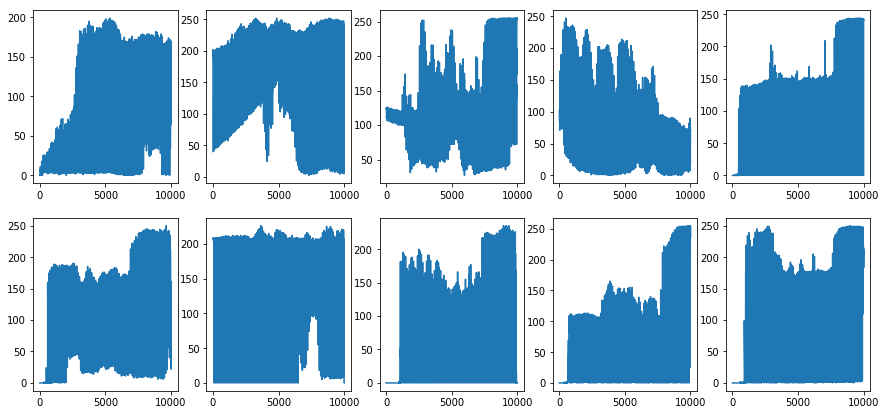

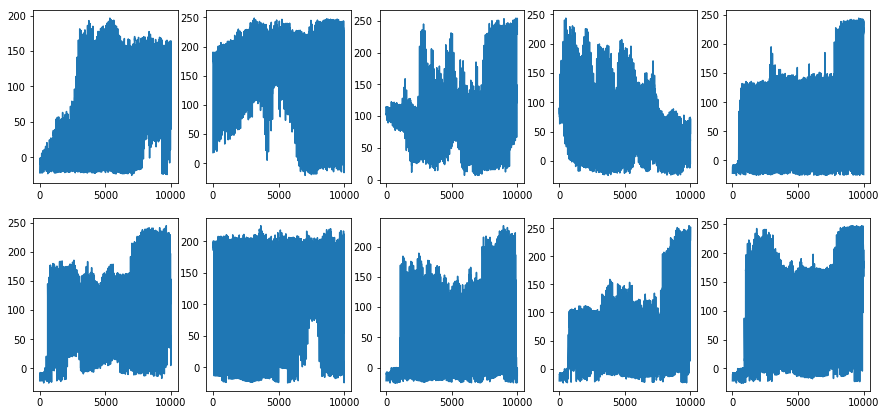

In [2]:
images_flat = images.reshape(10, shape[0]*shape[1])

fig, axes = plt.subplots(2, 5, figsize=(15, 7))

for img, ax in zip(images_flat, axes.flatten()):
    ax.plot(img)
    
mean_img = sum(images_flat) / 10

def reduce_mean(img):
    return img - mean_img

images_flat_std = reduce_mean(images_flat)

fig, axes = plt.subplots(2, 5, figsize=(15, 7))
for img, ax in zip(images_flat_std, axes.flatten()):
    ax.plot(img)

# del images_flat

In [3]:
images_flat_std

array([[-21.8, -11.6, -11.6, ...,  99.5,  91.1,  40. ],
       [ 18.2, 185.4, 182.4, ...,   9.5,  17.1,  -3. ],
       [102.2, 112.4, 112.4, ..., 240.5, 254.1, 229. ],
       ...,
       [-21.8, -11.6, -11.6, ..., -14.5,  -0.9, -24. ],
       [-21.8, -11.6, -11.6, ..., 234.5, 252.1, 229. ],
       [-21.8, -11.6, -11.6, ..., 174.5, 186.1, 161. ]])

In [4]:
corr_matrix = np.cov(images_flat_std)

In [5]:
corr_matrix

array([[ 3855.20537929, -1912.83252509,   452.24411787,  -288.39701804,
         1128.75247696,  2167.03275343,   -89.9817323 ,  1709.82067812,
         1277.83592418,  1326.75925153],
       [-1912.83252509,  5994.38210337,   289.36164425,  1120.09027676,
        -1628.89455531, -1104.0195864 ,  1248.7510585 ,  -381.29489703,
        -1421.74150331,  -755.72177066],
       [  452.24411787,   289.36164425,  2393.91545771,    44.42353927,
         1212.23492529,   324.59019788,  -212.17241357,   254.12384615,
          979.99155641,   392.56302011],
       [ -288.39701804,  1120.09027676,    44.42353927,  2395.84601202,
         -441.75593749,  -312.87299023,   520.99333326,   -32.9376968 ,
          -90.68122246,  -752.67631812],
       [ 1128.75247696, -1628.89455531,  1212.23492529,  -441.75593749,
         5466.82010024,   671.35177629,  -474.97348694,  1051.37146216,
         2322.7743825 ,  1443.1583514 ],
       [ 2167.03275343, -1104.0195864 ,   324.59019788,  -312.87299023,
   

In [6]:
corr_matrix.shape

(10, 10)

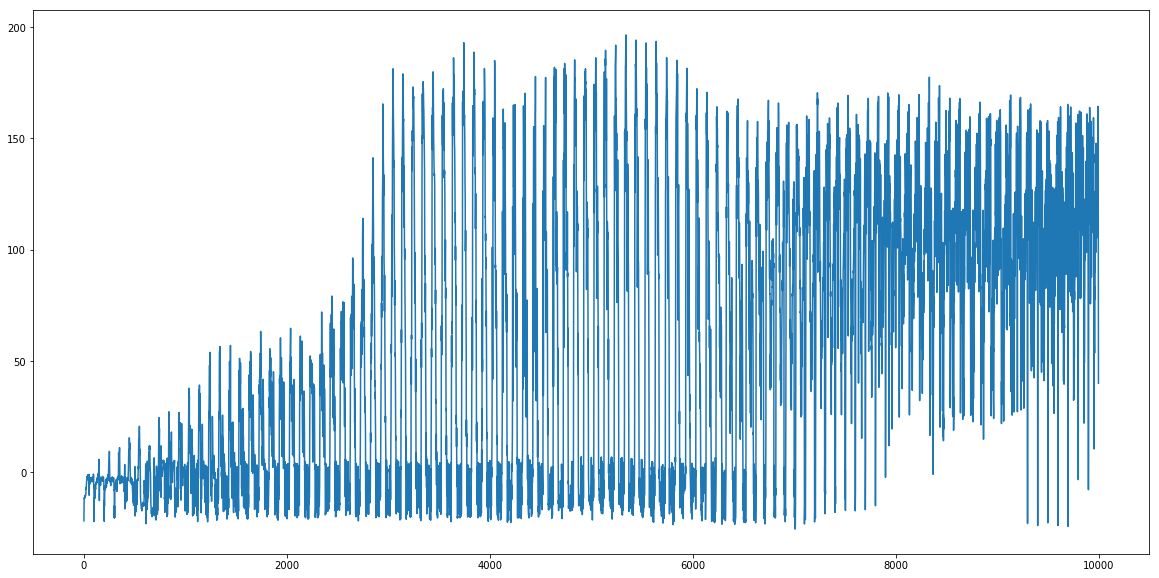

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(images_flat_std[0])

# del images_flat_std

In [8]:
# eig = LA.eig(corr_matrix)
eig = eigh(corr_matrix)
eig

(array([  974.28387298,  1086.34909825,  1612.39370905,  1889.81901582,
         2101.85662997,  2591.63746818,  3758.79424769,  5112.21591416,
         5447.33691637, 13230.09039379]),
 array([[-0.14529978, -0.62722026, -0.12507847,  0.31712572,  0.00768479,
         -0.17303671,  0.45260817,  0.29304833, -0.08775247,  0.37528208],
        [ 0.14527616, -0.28438765, -0.24726646,  0.06508106, -0.06576014,
          0.00513195, -0.20764092, -0.09007534, -0.77826116, -0.41397195],
        [-0.27103702,  0.34472498,  0.29344925,  0.59824133, -0.26681185,
         -0.39248825, -0.05290922, -0.27507611, -0.21564618,  0.11616094],
        [-0.35085678,  0.01464905,  0.22135836, -0.4950822 ,  0.43783164,
         -0.54372806,  0.19109395, -0.05071515, -0.20559394, -0.11783243],
        [-0.1569469 , -0.07762568, -0.348375  , -0.31149442, -0.22402338,
          0.09828378,  0.10645004, -0.70866478, -0.06459189,  0.41640405],
        [ 0.1647902 ,  0.26581494, -0.11733335, -0.36581756, -0.48703

In [9]:
eig[0].shape, eig[1].shape

((10,), (10, 10))

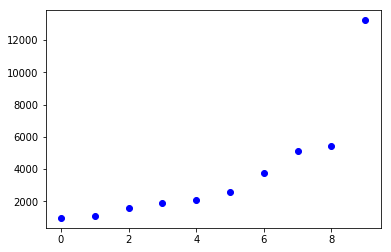

In [10]:
fig, ax = plt.subplots()
# ax.set_yscale('log')
plt.plot(eig[0][:20], 'bo')

In [11]:
# this is sorting by eigen value below but I think it is already sorted automatically by numpy
# eig_sorted = list(zip(*sorted(zip(*eig), reverse=True)))

In [12]:
eig[1][-1]

array([-0.37550448, -0.12110877,  0.44724931, -0.0895864 ,  0.12444903,
        0.49398038, -0.36609976,  0.13426036, -0.29705319,  0.36942081])

In [13]:
plt.imshow(eig[1][-4].reshape(shape).astype(np.float))

ValueError: cannot reshape array of size 10 into shape (100,100)

In [ ]:
# sum(images_flat).reshape(shape)
# (eig[1].dot(images_flat_std[0]))
# .reshape(shape)

eig_vectors = eig[1]

w0 = eig_vectors[0].T.dot(images_flat_std[0])
w1 = eig_vectors[1].T.dot(images_flat_std[0])
w2 = eig_vectors[2].T.dot(images_flat_std[0])
w3 = eig_vectors[3].T.dot(images_flat_std[0])
w4 = eig_vectors[4].T.dot(images_flat_std[0])
w5 = eig_vectors[5].T.dot(images_flat_std[0])
w6 = eig_vectors[6].T.dot(images_flat_std[0])
w7 = eig_vectors[7].T.dot(images_flat_std[0])
w8 = eig_vectors[8].T.dot(images_flat_std[0])
w9 = eig_vectors[9].T.dot(images_flat_std[0])

fix, ax = plt.subplots(1, 2, figsize=(20, 10))

new_image = mean_img + w0 * eig_vectors[0]

ax[0].imshow(new_image.reshape(shape).astype(np.float), cmap=plt.cm.gray)

new_image = mean_img + w0 * eig_vectors[0] + w1 * eig_vectors[1] + \
                       w2 * eig_vectors[2] + w3 * eig_vectors[3] + \
                       w4 * eig_vectors[4] + w5 * eig_vectors[5] + \
                       w6 * eig_vectors[6] + w7 * eig_vectors[7] + \
                       w8 * eig_vectors[8] + w9 * eig_vectors[9]

ax[1].imshow(10*new_image.reshape(shape).astype(np.float), cmap=plt.cm.gray)

In [ ]:
w1, w2, w3, w4, w5, w6, w7, w8, w9